### ***4.1***  试证明对于不含冲突数据(即特征向量完全相同但标记不同)的训练集，必存在与训练集一致(即训练误差为0)的决策树

不含有特征向量相同但标记不同的冲突数据 and 决策树按照属性特征来划分，相同属性特征的样本最终会进入同一个叶子节点 >- 如果含有特征向量相同但标记不同的冲突数据 >- 必然至少存在一对样本，属性相同而分类不同，即产生了训练误差 >- 不含有特征向量相同但标记不同的冲突数据

### ***4.2*** 试分析使用＂最小训练误差＂作为决策树划分选择准则的缺陷

简单的使用最小误差原理会导致机器学习产生严重的过拟合，严重影响机器学习的泛化能力。

### ***4.3*** 试编程实现基于信息熵进行划分选择的决策树算法,并为表4.3中数据生成一颗决策树

信息熵（香农熵）计算公式为   Ent(D)=−∑|y|k=1pklog2pk  其中，pk是当前样本集合D中第k类样本所占比例，|y|代表共有多少类样本，计算香农熵主要就是计算pk=第k类样本的数量样本总数 ，而第k类样本的数量可以通过建立字典来统计，样本总数就简单了。

#### 香农熵的实现代码：
```
def calcShannoEnt(dataset):
    from math import log
    total_number = len(dataset)
    label_dict = {}
    for data_line in dataset:
        label = data_line[-1]
        label_dict[label] = label_dict.get(label,0) + 1
    #计算香农熵
    ShannoEnt = 0
    for key in label_dict.keys():
        prob = float(label_dict[key]) / total_number
        ShannoEnt -= prob * log(prob, 2)
    return ShannoEnt
```

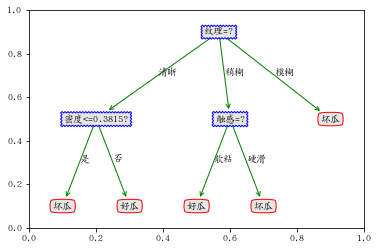

In [6]:
import numpy as np
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from tree4_3 import treeGenerate,countLeaf,giveLeafID,dfsPlot,plotNode
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
dataset = pd.read_excel('./WaterMelon_3.0.xlsx',encoding = 'gbk')  # 读取数据
Attributes = dataset.columns        #所有属性的名称
#print(Attributes)
m,n = np.shape(dataset)   # 得到数据集大小
dataset = np.matrix(dataset)
for i in range(m):      # 将标签替换成 好瓜 和 坏瓜
    if dataset[i,n-1]=='是': dataset[i,n-1] = '好瓜'
    else : dataset[i,n-1] = '坏瓜'
attributeList = []       # 属性列表，每一个属性的取值，列表中元素是集合
for i in range(n):
    curSet = set()      # 使用集合是利用了集合里面元素不可重复的特性，从而提取出了每个属性的取值
    for j in range(m):
        curSet.add(dataset[j,i])
    attributeList.append(curSet)
#print(attributeList)
D = np.arange(0,m,1)     # 表示每一个样本编号
A = list(np.ones(n))    # 表示每一个属性是否被使用，使用过了标为 -1
A[-1] = -1              # 将数据里面的标签和编号列标记为 -1
A[0] = -1
#print(A)
#print(D)
EPS = 0.000001
decisionNode = dict(boxstyle = "sawtooth",fc = "0.9",color='blue')
leafNode = dict(boxstyle = "round4",fc="0.9",color='red')
arrow_args = dict(arrowstyle = "<-",color='green')
myDecisionTreeRoot = treeGenerate(D,A,"root")        # 生成决策树
cnt,deep = countLeaf(myDecisionTreeRoot,0)     # 得到树的深度和叶子节点的个数
giveLeafID(myDecisionTreeRoot,0)
# 绘制决策树
fig = plt.figure(1,facecolor='white')
rootX = dfsPlot(myDecisionTreeRoot,cnt,leafNode,decisionNode,deep)
plotNode(myDecisionTreeRoot.v,(rootX,0.9),(rootX,0.90),decisionNode)
plt.show()

### ***4.4*** 　试编程实现基于基尼指数进行划分选择的决策树算法，为表4.2中数据生成与预剪枝,后剪枝决策树，并与未剪枝决策树进行比较

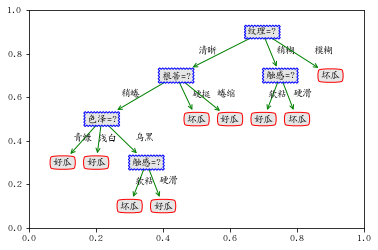

In [2]:
import numpy as np
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from tree4_4 import treeGenerate,countLeaf,giveLeafID,dfsPlot,plotNode
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
dataset = pd.read_excel('./WaterMelon_2.0.xlsx',encoding = 'gbk')  # 读取数据
Attributes = dataset.columns[:-1]        #所有属性的名称
#print(Attributes)
dataset = np.matrix(dataset)
dataset = dataset[:,:-1]
m,n = np.shape(dataset)   # 得到数据集大小
for i in range(m):      # 将标签替换成 好瓜 和 坏瓜
    if dataset[i,n-1]=='是': dataset[i,n-1] = '好瓜'
    else : dataset[i,n-1] = '坏瓜'
attributeList = []       # 属性列表，每一个属性的取值，列表中元素是集合
for i in range(n):
    curSet = set()      # 使用集合是利用了集合里面元素不可重复的特性，从而提取出了每个属性的取值
    for j in range(m):
        curSet.add(dataset[j,i])
    attributeList.append(curSet)
#print(attributeList)
D = np.arange(0,m,1)     # 表示每一个样本编号
A = list(np.ones(n))    # 表示每一个属性是否被使用，使用过了标为 -1
A[-1] = -1              # 将数据里面的标签和编号列标记为 -1
A[0] = -1


#print(D)
EPS = 0.000001
myDecisionTreeRoot = treeGenerate(D,A,"root")        # 生成决策树
cnt,deep = countLeaf(myDecisionTreeRoot,0)     # 得到树的深度和叶子节点的个数
giveLeafID(myDecisionTreeRoot,0)
# 绘制决策树
fig = plt.figure(1,facecolor='white')
rootX = dfsPlot(myDecisionTreeRoot,cnt,deep)
plotNode(myDecisionTreeRoot.v,(rootX,0.9),(rootX,0.9),decisionNode)
plt.show()

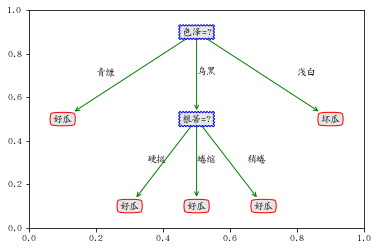

In [8]:
##预剪枝
import numpy as np
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from pretree4_4 import treeGenerate,countLeaf,giveLeafID,dfsPlot,plotNode
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 

dataset = pd.read_excel('./WaterMelon_2.0.xlsx',encoding = 'gbk')  # 读取数据
Attributes = dataset.columns[:-1]        #所有属性的名称
#print(Attributes)
dataset = np.matrix(dataset)
m,n = np.shape(dataset)
D_train = []                 # 得到所有的训练样本编号和验证样本编号
D_test = []
for i in range(m):
    if dataset[i,n-1]=='train':D_train.append(i)
    else:D_test.append(i)
#print(D_test)
#print(D_train)
dataset = dataset[:,:-1]
m,n = np.shape(dataset)   # 得到数据集大小
for i in range(m):      # 将标签替换成 好瓜 和 坏瓜
    if dataset[i,n-1]=='是': dataset[i,n-1] = '好瓜'
    else : dataset[i,n-1] = '坏瓜'
attributeList = []       # 属性列表，每一个属性的取值，列表中元素是集合
for i in range(n):
    curSet = set()      # 使用集合是利用了集合里面元素不可重复的特性，从而提取出了每个属性的取值
    for j in range(m):
        curSet.add(dataset[j,i])
    attributeList.append(curSet)
#print(attributeList)
A = list(np.ones(n))    # 表示每一个属性是否被使用，使用过了标为 -1
A[-1] = -1              # 将数据里面的标签和编号列标记为 -1
A[0] = -1


myDecisionTreeRoot = treeGenerate(D_train,D_test,A,"root")        # 生成决策树
cnt,deep = countLeaf(myDecisionTreeRoot,0)     # 得到树的深度和叶子节点的个数
giveLeafID(myDecisionTreeRoot,0)
# 绘制决策树
decisionNode = dict(boxstyle = "sawtooth",fc = "0.9",color='blue')
leafNode = dict(boxstyle = "round4",fc="0.9",color='red')
arrow_args = dict(arrowstyle = "<-",color='green')
fig = plt.figure(1,facecolor='white')
rootX = dfsPlot(myDecisionTreeRoot,cnt,deep)
plotNode(myDecisionTreeRoot.v,(rootX,0.9),(rootX,0.9),decisionNode)
plt.show()


### **4.7**   图4.2是一个递归算法，若面临巨量数据，则决策树的层数会很深，使用递归方法易导致“栈”溢出，试使用“队列”数据结构，以参数maxDepth控制数的最大深度，写出与图4.2等价、但不使用递归的决策树生成算法。

直接递归会导致大量的临时变量被存储，层数过深时会导致“栈”溢出。用队列进行层次遍历生成决策树，用Max_Depth来控制决策树的最大深度，队列中每个元素代表着决策树的每个节点，它必要的属性有：样本集合、剩余属性集合、当前层数标记、父节点序号。队列开始只有一个元素，就是最初的状态，带着所有样本的根节点。然后当队列不为空的时候开始循环，每次取出一个元素来判断是否需要划分，如果不需要，该元素就变成一个叶节点，弹出队列就不用再管了；如果需要划分就找出最好的划分属性，然后分成n个子区间，依次送入队列，继续循环，直到队列为空。

是否需要划分有三个依据：当前所有样本属于一类、当前所有样本属性完全相同、达到Max_Depth

这样即完成了层次遍历(广度优先搜索)决策树的构建。

显然由于每次出队列的元素要先完全划分，所以进行的是预剪枝算法，队列结构很方便，如果是后剪枝，必须要等到决策树完全生成才能进行。

输入：训练集 D={(x1,y1),(x2,y2),...,(xm,ym)};
 
      属性集 A={a1,a2,...,ad}
 
      最大深度 MaxDepth
 
构建一个结点类：Node     
   存贮的信息：节点文字信息、节点深度、节点所含样本集、节点所含的可用属性、节点的孩子节点列表、节点名称、该节点用来划分的最佳属性的编号（仅针对非叶节点，其余为默认值0）
 
过程：函数TreeGenerate(D,A,MaxDepth)
    1: 生成结点  node;
    2: if D中样本属于同一类别C  then
    3:     将node标记为C类叶节点；return
    4: end if
    5: if A是空集或者D中样本在A中取值相同  then
    6:     将node标记为叶节点，类别为D中样本数最多的类； return
    7: end if
    8: 从A中选择最优划分属性a*;
    9: 将node标记为分支节点，给node相应的变量赋值，包括深度、样本集、属性集、最佳属性编号、文字信息等
   10: 将node加入到结点列表nodeQueue中
   11: while nodeQueue != []:
   12:     取出一个节点，记为curnode        (此处，只需改动取元素的方式就可以分别实现队列和栈)
   13:     if curnode的深度已经大于等于最大深度: then
   14:          将curnode标记为叶节点，类型为其自身包含的样本集中样本数目最多的类别数
   15:          continue
   16:     for a*包含的每一个值 a*v   do:
   17:          生成curnode的一个分支节点，记为nextnode
   18:          给nextnode初始化深度、属性集等信息
   19:          找到curnode包含的样本集中属性值是a*v的所有样本，记为Dv
   20:          给nextnode初始化样本集,就等于Dv
   21:          if nextnode的样本集为空     then
   22:               将nextnode记为叶子节点，类别为curnode样本集中样本数目最多的类别
   23:          elif nextnode的样本集中样本均属于同一类C   then
   24:               将nextnode记为叶子节点，类别为C
   25:          elif nextnode的可划分属性集为空 或者 它的样本集中所有的可划分属性取值均相同
   26:               将nextnode记为叶子节点，类别为nextnode样本集中样本数目最多的类别
   27:          else 
   28:               从nextnode所包含的可划分属性集中选择出最佳划分属性a*'
   29:               将nextnode的节点文字信息记为a*'
   30:               将节点nextnode加入到结点列表nodeQueue中
   31:          end if
   32:     end for
   33: end while
   34: 返回结点 node
   35: 输出：得到的是以node为根节点的一棵决策树

加入： 纹理=?
取出： 纹理=?
加入： 根蒂=?
加入： 触感=?
取出： 触感=?
取出： 根蒂=?
加入： 色泽=?
取出： 色泽=?
加入： 触感=?
取出： 触感=?


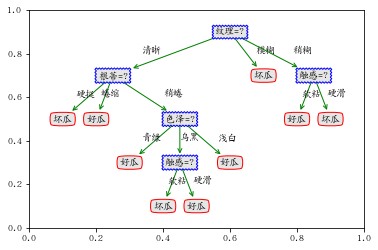

In [10]:
#下面给出使用 栈 数据结构进行深度优先搜索，并基于基尼指数进行划分选择，采用非递归方式生成决策树的代码实现
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
from tree4_7 import treeGenerate,plotTree
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
dataset = pd.read_excel('./WaterMelon_2.0.xlsx',encoding = 'gbk')  # 读取数据
Attributes = dataset.columns[:-1]        #所有属性的名称
#print(Attributes)
dataset = np.matrix(dataset)
dataset = dataset[:,:-1]
m,n = np.shape(dataset)    # 得到数据集大小
D = np.arange(0,m,1)
A = list(np.ones(n))    # 表示每一个属性是否被使用，使用过了标为 -1
A[-1] = -1              # 将数据里面的标签和编号列标记为 -1
A[0] = -1
#print(A)
#print(D)
myDecisionTreeRoot = treeGenerate(D,A,"root",5)            # 生成未剪枝决策树
plotTree(myDecisionTreeRoot)         

### **4.8** 试将决策树生成的深度有限搜索过程修改为广度优先搜索，以参数MaxNode控制树的最大结点树，将题4.7中基于队列的决策树算法进行改写.对比题4.7中的算法,试分析那种方式更易于控制决策树锁需存储不超过内存


当采用  最大节点数  进行控制时，此时我们只适合采用队列数据结构进行广度优先的搜索算法，而不能再进行深度优先的搜索。 
因为，若进行深度优先的搜索，可能出现一种情况就是当某一个分支一直搜索到最深处时，达到了最大节点的限制要求，此时，其他分支可能还没来的及划分就已经结束，这样就会生成一棵畸形树。也就是决策树看起来某一个分支深度很深，而有些分支可能只有一层，这样的决策树肯定不是我们希望得到的。   所以题目也明确指出使用广度优先。            
而采用广度优先搜索时，就可以很好地解决这个问题。因为广度优先就要求每一层每一层进行处理，所以即使在处理某一个节点时达到了最大节点数的限制，此时，这个决策树也不会出现畸形（理论上只会差一层）。
关于在最大节点数的限制下进行广度优先搜索的算法，其实只需要将上面代码中的限制条件改成最大节点数限制即可，应该不是很困难，具体的代码有空再补上。
 
对于  使用最大节点数控制的广度优先搜索   和   使用最大深度控制的深度优先搜索或者广度优先搜索    哪一种更易于控制决策树所需存贮不超过内存的问题，我个人见解如下（我个人认为题目中所述的比较两种方式，主要是让比较两种不同的控制方式的差异，而不是比较深度搜索和广度搜索的差异）：
        我认为最大节点数控制的广度优先搜索更容易控制内存。
        假设，当所有属性的取值有很多种时，标志着决策树每一个非叶节点的直接子节点数量会很大，形象点说，就是树看起来很胖。此时，如果使用最大深度控制的深度优先搜索，当搜索到最深处的一个节点处时，可能他的深度还没有达到最大深度的限制，但是可以想象，由于先进后出的原则，这个最深处节点的所有兄弟节点、它的父节点的所有兄弟节点、它的祖父节点的所有兄弟节点……依次类推，直到根节点，这些所有节点必然还存留在栈中等待处理。而此时该节点的深度可能并不是很深，但是内存必然已经占用了很多。            同样，广度优先搜索时也存在这样的问题，可能深度很小，但是队列中等待处理的节点数目已经很大，占用了很大内存。           因为内存占用的多少是和等待处理的结点数目直接相关，而和树的深度并没有很直接的联系。
       再者，让我们来看最大节点数目控制的广度优先搜索的情况。在使用最大节点数目进行控制的广度优先搜索时，不论每一个非叶节点的子节点的数目有多大，我们总可以通过控制最大节点数目来保证所占用的内存肯定低于某一个确定的值。这样就可以控制内存不会溢出。